In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

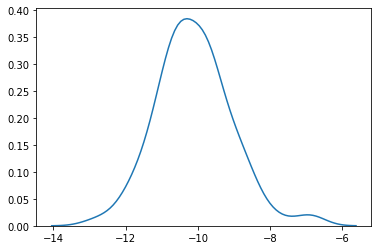

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0677: 100%|██████████| 1500/1500 [00:05<00:00, 290.15it/s]


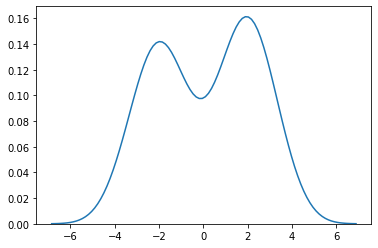

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 2.1456723 ,  2.0329053 ,  2.1328707 , -1.249318  ,
              1.747747  ,  3.6917145 ,  1.530686  , -0.24596034,
             -1.3987895 ,  0.7633247 , -0.7843826 , -2.4817152 ,
              0.84988326, -0.05358666, -0.96264267,  3.2320318 ,
             -2.334177  , -0.8874711 ,  1.6205463 ,  1.2493378 ,
              0.0847991 , -2.4424157 ,  2.934377  ,  2.7804778 ,
              3.0647972 ,  1.0395592 , -1.5614123 , -1.8327225 ,
             -3.3443782 ,  0.40425137, -1.7007833 , -2.9868116 ,
              2.4138086 , -2.1305885 , -2.012011  , -0.7717887 ,
             -2.365731  ,  1.3988107 ,  3.797321  ,  2.5968618 ,
             -2.7511513 , -3.7334688 ,  2.212736  , -2.900756  ,
              1.9556588 , -2.0818703 , -2.78913   ,  0.3615931 ,
             -2.0819495 , -2.5070763 ,  1.5459605 , -1.7201356 ,
              1.8951007 ,  1.6279958 ,  2.3463967 , -3.6626568 ,
              2.7771413 ,  1.7906327 ,  3.411972  ,  1.8644881 ,
              3.3871439 ,